<a href="https://colab.research.google.com/github/sekadiv/ML/blob/master/SatckOverflowCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting the GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import io
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm_notebook
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [3]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

In [4]:
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

--2021-02-22 04:49:29--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 52.217.70.180
Connecting to stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)|52.217.70.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923682009 (1.8G) [text/csv]
Saving to: ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Questions.csv’

Questions.csv       100%[===================>]   1.79G  33.5MB/s    in 57s     

2021-02-22 04:50:26 (32.4 MB/s) - ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Questions.csv’ saved [1923682009/1923682009]



In [5]:
qdf = pd.read_csv(os.path.join(root_path, 'Questions.csv'),encoding='latin-1')

In [6]:
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

--2021-02-22 04:51:13--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 52.216.96.219
Connecting to stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)|52.216.96.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1607914819 (1.5G) [text/csv]
Saving to: ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Answers.csv’

Answers.csv         100%[===================>]   1.50G  33.3MB/s    in 48s     

2021-02-22 04:52:02 (31.9 MB/s) - ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Answers.csv’ saved [1607914819/1607914819]

--2021-02-22 04:52:02--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 52

In [7]:
ansdf = pd.read_csv(os.path.join(root_path, 'Answers.csv'),encoding='latin-1')
tagsdf=pd.read_csv(os.path.join(root_path, 'Tags.csv'),encoding='latin-1')
usersdf=pd.read_csv(os.path.join(root_path, 'Users.csv'),encoding='latin-1')

In [ ]:
#Loading the Datasets Directly from S3
#question_file = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv'        
#qdf = pd.read_csv(question_file,encoding='latin-1')
#answers_file='https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv'
#ansdf=pd.read_csv(answers_file,encoding='latin-1')
#tags_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv"
#tagsdf=pd.read_csv(tags_file,encoding='latin-1')
#users_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv"
#usersdf=pd.read_csv(users_file,encoding='latin-1')

In [8]:
qdf.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


In [25]:
tagsdf.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [26]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...


In [ ]:
usersdf.head(2)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


**Data Cleaning**
Removing Null Columns and Rows 
Removing unwanted Columns in the Dataset

In [9]:
qdf.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [10]:
#Calculating the missing value in Closed Date
100.0*(qdf.ClosedDate.isnull().sum())/len(qdf)

95.57362033070298

**95 % **of closed date is missing so we can drop Closed Date column

In [11]:
#Dropping Body column as it is not needed for the Analysis
qdf.drop(columns=["ClosedDate","Body"],axis=1,inplace=True)

In [12]:
qdf.head(2)

,Id,OwnerUserId,CreationDate,Score,Title
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...


In [13]:
ansdf.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [14]:
missing_ownerid_ansdf=100.0*(ansdf.OwnerUserId.isnull().sum())/len(ansdf)

In [15]:
print('Missing Percentage of OwnerUserID Column is : ', missing_ownerid_ansdf)

Missing Percentage of OwnerUserID Column is :  0.6552442373254915


In [16]:
#Dropping Rows in answer where owneruserid is null
ansdf=ansdf[~ansdf["OwnerUserId"].isnull()]

In [17]:
ansdf.OwnerUserId.isnull().sum()

0

In [18]:
#Dropping Body Column in the Answer Dataset
ansdf.drop(columns="Body",axis=1,inplace=True)


In [19]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01T14:45:37Z,90,13
1,124,26.0,2008-08-01T16:09:47Z,80,12


In [19]:
#Dropping the unnamed column in users dataset
usersdf.drop(columns="Unnamed: 0",axis=1,inplace=True)
usersdf.head(2)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [20]:
#dropping Creation Date as its not needed for the analysis
usersdf.drop(columns=["creation_date","display_name"],axis=1,inplace=True)
usersdf.head(2)

,id,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [21]:
#Duplicates in users Dataset
print("Duplicated id of 26 in users dataset ",len(usersdf[usersdf.id==26]))

Duplicated id of 26 in users dataset  27


In [22]:
#Dropping Duplicated Rows in ID 
usersdf.drop_duplicates(subset="id",inplace=True)

In [23]:
print("Duplicated id  users dataset ", usersdf.id.duplicated().any())

Duplicated id  users dataset  False


In [24]:
tagsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [25]:
tagsdf["Tag"]=tagsdf["Tag"].astype(str)

In [26]:
#Merging Tags into one column by splitting by space
tags_grouped=tagsdf.groupby('Id')['Tag'].apply(' '.join).reset_index()

In [27]:
tags_grouped.head(2)

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging


In [28]:
tags_grouped["Tag"].describe()

count     1264216
unique     685700
top       android
freq         9323
Name: Tag, dtype: object

In [29]:
#Datetime conversion for Date columns in all the Dataset
qdf["CreationDate"]=pd.to_datetime(qdf["CreationDate"])
ansdf["CreationDate"]=pd.to_datetime(ansdf["CreationDate"])
usersdf["last_access_date"]=pd.to_datetime(usersdf["last_access_date"])

Merging the Datasets

In [30]:
merged_table=pd.merge(qdf,tags_grouped,on=["Id","Id"],how="outer")

In [31]:
merged_table.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,svn tortoisesvn branch branching-and-merging


In [32]:
len(merged_table[merged_table.Tag == None])

0

In [33]:
merged_table.shape

(1264216, 6)

In [34]:
merged_table.describe()

,Id,OwnerUserId,Score
count,1.264216e+06,1.249762e+06,1.264216e+06
mean,2.132745e+07,2.155177e+06,1.781537e+00
std,1.151445e+07,1.801265e+06,1.366389e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.142598e+07,6.589110e+05,0.000000e+00
50%,2.172542e+07,1.611830e+06,0.000000e+00
75%,3.154542e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


In [35]:
#Changing the Column name OwnerUserid to q_uesrid and Score to q_score and id to q_id
merged_table.rename(columns={"OwnerUserId": "q_userid","Score":"q_score","Id":"q_Id","Title":"q_Title","CreationDate":"q_CreationDate"},inplace=True)

In [36]:
merged_table.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,svn tortoisesvn branch branching-and-merging


In [37]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01 14:45:37+00:00,90,13
1,124,26.0,2008-08-01 16:09:47+00:00,80,12


In [38]:
#Renaming Columns Id to a_id and OwnerUserid to a_userid ,CreationDate to a_CreationDate,Score to a_Score
ansdf.rename(columns={"Id":"a_Id","OwnerUserId":"a_userid","CreationDate":"a_CreationDate","Score":"a_Score","ParentId":"q_Id"},inplace=True)

In [51]:
ansdf.head(2)

,a_Id,a_userid,a_CreationDate,q_Id,a_Score
0,92,61.0,2008-08-01 14:45:37+00:00,90,13
1,124,26.0,2008-08-01 16:09:47+00:00,80,12


In [39]:
merged_table["q_Id"].duplicated().any()


False

In [53]:
merged_table.shape

(1264216, 6)

In [40]:
#Merging answer and Question
merged_q_a=pd.merge(merged_table,ansdf,on=["q_Id","q_Id"],how="inner")

In [41]:
merged_q_a.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,10008,1109.0,2008-08-13 16:09:09+00:00,6


In [42]:
merged_q_a["q_Id"].duplicated().any()

True

In [43]:
merged_q_a.shape


(2001316, 10)

In [44]:
usersdf.head(2)

,id,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
27,1109,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905


In [46]:
usersdf.rename(columns={"id":"userid"},inplace=True)

In [60]:
usersdf.head(2)

,userid,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
27,1109,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905


In [47]:
usersdf.userid.duplicated().any()

False

In [48]:
#Merging User table as well
merged_whole=pd.merge(merged_q_a,usersdf,left_on="a_userid",right_on="userid",how="inner")

In [49]:
merged_whole.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,580,91.0,2008-08-02 23:30:59+00:00,21,Deploying SQL Server Databases from Test to Live,sql-server sql-server-2005 deployment release-...,1464,26.0,2008-08-04 18:00:50+00:00,5,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [50]:
merged_whole.shape

(1990480, 16)

In [51]:
merged_whole.describe()

,q_Id,q_userid,q_score,a_Id,a_userid,a_Score,userid,reputation,up_votes,down_votes,views
count,1.990480e+06,1.960156e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06
mean,1.809171e+07,1.813723e+06,5.654644e+00,1.916351e+07,1.480737e+06,2.485415e+00,1.480737e+06,4.545504e+04,1.539702e+03,8.212407e+02,9.450821e+03
std,1.167883e+07,1.698687e+06,4.671906e+01,1.167345e+07,1.543848e+06,1.596865e+01,1.543848e+06,1.226378e+05,3.494248e+03,4.199035e+03,7.877572e+04
min,8.000000e+01,1.000000e+00,-7.300000e+01,9.200000e+01,1.000000e+00,-4.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.715652e+06,4.408440e+05,0.000000e+00,8.876039e+06,2.797618e+05,0.000000e+00,2.797618e+05,9.310000e+02,5.800000e+01,2.000000e+00,1.090000e+02
50%,1.712833e+07,1.235303e+06,1.000000e+00,1.866768e+07,9.494760e+05,1.000000e+00,9.494760e+05,5.042000e+03,3.530000e+02,1.800000e+01,5.290000e+02
75%,2.804313e+07,2.784556e+06,3.000000e+00,2.929020e+07,2.183668e+06,2.000000e+00,2.183668e+06,2.806100e+04,1.470000e+03,1.490000e+02,2.675000e+03
max,4.014319e+07,7.046594e+06,5.190000e+03,4.014339e+07,7.045028e+06,5.718000e+03,7.045028e+06,1.128126e+06,1.005200e+05,7.495500e+04,1.835157e+06


**Data Analysis**

**3.While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.**



**Analysis of Top 25 Trending Tags this will help us to understand the active community of tags so that we can suggest the active community tags to the user depending upon the question **

In [52]:
from collections import Counter

In [53]:
tags = list (merged_whole['Tag'].unique())
all_tags = []
for tag in tags:
    all_tags += tag.split(' ')

In [54]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

Text(0.5, 1.0, 'Top 25 Tags')

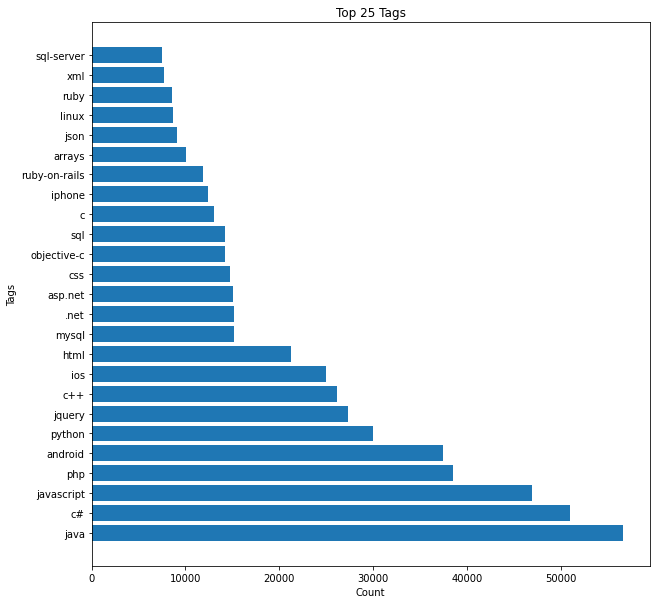

In [55]:
plt.barh(list (tags['tag'])[:25], list (tags['count'])[:25])
plt.ylabel('Tags')
plt.xlabel('Count')
plt.title('Top 25 Tags')

**Inference : Java is more popular tag in which questions were raised, then C# so when a user raises a question we can enable auto tagging based on the title of the question for maximum reach and the question can get answered quickly**

**Popular Tags in Datascience**

In [56]:
Datascience_list=['python', 'r', 'matlab', 'sas', 'excel', 'sql']
for i in Datascience_list :
  x = []
  y = []
  for tag in Datascience_list:
    index = list (tags['tag']).index(tag)
    x.append(tag)
    y.append(list (tags['count'])[index])

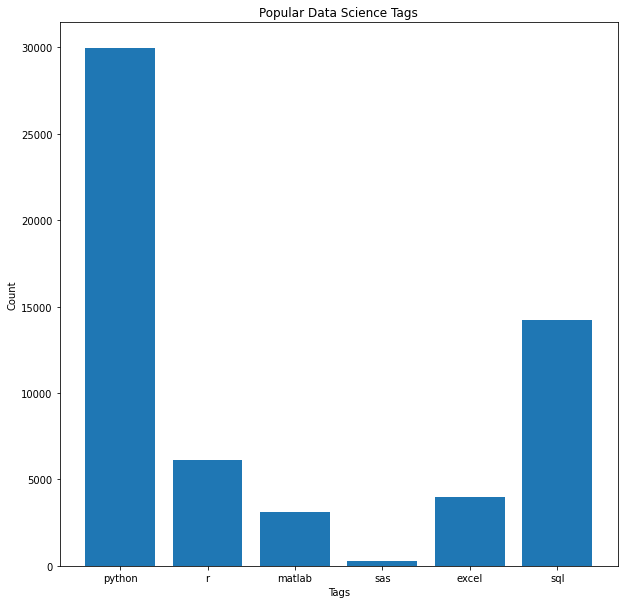

In [57]:
plt.bar(x, y)
plt.ylabel('Count')
plt.xlabel('Tags')
plt.title('Popular Data Science Tags')
plt.show()

**Python is more popular in Datascience tags than sql as it is a general programming so once the user asks questions in python Stack overflow can suggest the user to tag the python tag using Auto tagging feature depending upon the question **

**Filtering the Datset with respect to Datascience tags**

In [58]:
Datascience=['python','r' ,'matlab', 'sas', 'excel', 'sql']
def filter_datascience(tags):
    """Function to check if tag is in most common tag list"""
    tags_filtered = []  
    for i in range(0, len(tags)):
      for j in range(i,len(Datascience)):
        if tags[i] == Datascience[j]:
            tags_filtered.append(tags[i])
    return ' '.join([str(x) for x in tags_filtered])
     

In [59]:
len(tagsdf[tagsdf.Tag == 'r'])

15701

In [60]:
merged_DS=merged_whole.copy()

In [64]:
len(merged_whole[merged_whole.Tag == 'r'])

4205

In [65]:
merged_DS.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,580,91.0,2008-08-02 23:30:59+00:00,21,Deploying SQL Server Databases from Test to Live,sql-server sql-server-2005 deployment release-...,1464,26.0,2008-08-04 18:00:50+00:00,5,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [66]:
merged_DS["Tags"]=merged_DS.Tag.apply(lambda x : x.split(" "))
#merged_DS.head(3)

merged_DS['Tags']=merged_DS.Tags.apply(lambda x: filter_datascience(x))
merged_DS['Tags'] = merged_DS['Tags'].apply(lambda x: x if len(x) >0 else None)

In [122]:
# Drop rows that contain None in Tags column
merged_DS.dropna(subset=['Tags'], inplace=True)
merged_DS.head(4)


,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views,Tags
6,252230,28004.0,2008-10-31 00:17:40+00:00,4,Stored procedures or inline queries?,sql stored-procedures subsonic,252595,26.0,2008-10-31 04:27:08+00:00,0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,sql
21,1990020,242085.0,2010-01-01 23:29:24+00:00,2,SQL statement - update on two tables,sql sql-server,1990040,26.0,2010-01-01 23:36:57+00:00,1,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,sql
105,120,83.0,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,sql asp.net sitemap,124363,12734.0,2008-09-23 22:41:11+00:00,9,12734,2019-08-29 19:59:10.743000+00:00,695,35,0,105,sql
113,1068900,NaN,2009-07-01 12:29:25+00:00,2,Keep code in separate file,php sql mysql,1068927,50.0,2009-07-01 12:34:48+00:00,1,50,2019-08-26 23:37:44.843000+00:00,8525,814,50,1731,sql


In [68]:
#Splitting only Tag and QID
tag_fg = merged_DS[["Tags","q_Id","Tag"]]


In [69]:
merged_DS.shape

(210361, 17)

In [70]:
tag_fg.shape

(210361, 3)

In [71]:
tag_fg.drop_duplicates(subset="q_Id",inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
tag_fg["q_Id"].duplicated().any()

False

In [73]:
tag_fg.shape

(115093, 3)

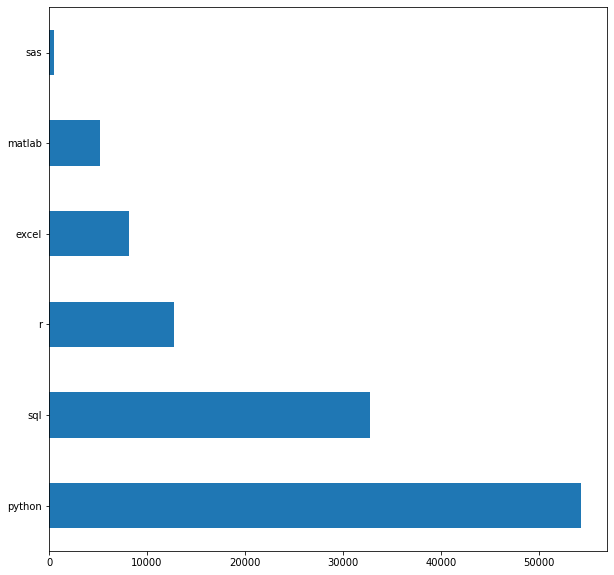

In [114]:
tag_fg.Tags.value_counts()[:6].plot.barh()
plt.title="Top Datascience Tagged Question"

In [80]:
tag_fg.groupby('Tags').size().sort_values(ascending=False)

Tags
python              54278
sql                 32810
r                   12775
excel                8161
matlab               5242
sas                   551
python sql            337
python excel          263
sql excel             161
python matlab         139
python r              118
r excel                56
sql sas                51
excel matlab           38
r matlab               37
sql r                  30
r sas                  17
excel sas               9
python sas              4
python r excel          4
sql matlab              3
python r matlab         2
python sql excel        2
r excel matlab          1
sql r sas               1
sql excel sas           1
sql r excel             1
excel r                 1
dtype: int64

**From the above graph we can infer that the most popular tag in the questions is the Datascience is Python and then sql**

**What are the scoring of Data Science related tags in Questions?**
We can suggest these questions the top score question related to tags to the users depending on the ratings

In [192]:
tag_rate = merged_DS[['Tags', 'q_score']].drop_duplicates().reset_index(drop=True)
tag_rate.shape

(666, 2)

In [194]:
tagRate = {}
for i in tqdm_notebook(range(len(tag_rate['Tags']))):
    for tag in tag_rate['Tags'][i].split(','):
        try:
            tagRate[tag].append(tag_rate['q_score'][i])
        except Exception:
            tagRate[tag] = [tag_rate['q_score'][i]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [195]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])

In [196]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'q_score']
tagRateAvg = tagRateAvg.sort_values('q_score')

In [197]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['q_score'])[index])

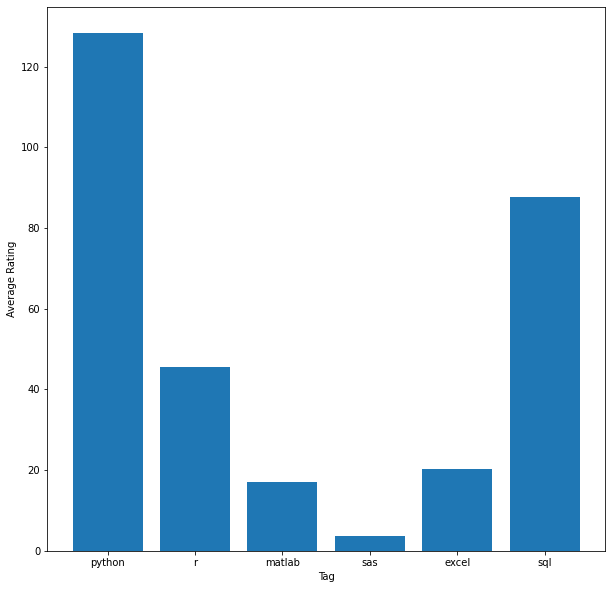

In [198]:
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
plt.title='Scoring of Data Science Tags'
plt.show()

From the above graph we can see that **Python** and **R** got the high scores but when most popular tags Python and SQL were highest . **R** scored higher than **SQL**.

Text(0.5, 1.0, 'excel')

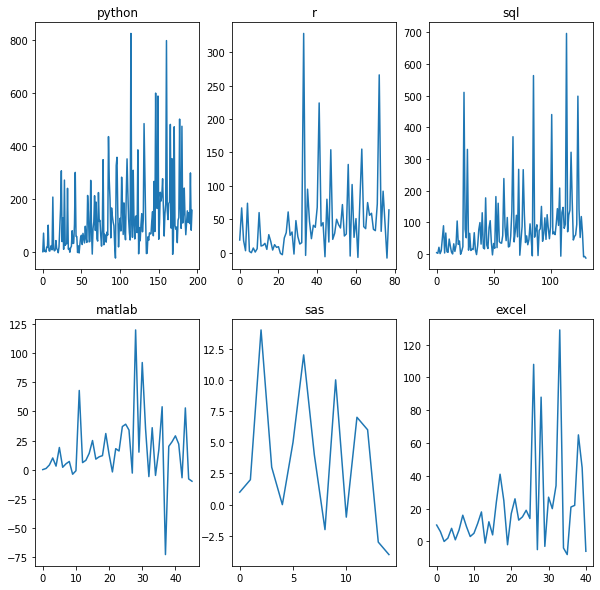

In [199]:
fig, ax = plt.subplots(2, 3)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['r'])
ax[0][1].set_title('r')

ax[0][2].plot(tagRate['sql'])
ax[0][2].set_title('sql')

ax[1][0].plot(tagRate['matlab'])
ax[1][0].set_title('matlab')

ax[1][1].plot(tagRate['sas'])
ax[1][1].set_title('sas')

ax[1][2].plot(tagRate['excel'])
ax[1][2].set_title('excel')

From the above python has lot of questions we can see that python and SQl has most questions. SAS has the least questions but still R scored well than SQL.Stack overflow should focus more on Python,R and SQL SME . 
MatLab,SAS  has negative scoring as well .

**What are the scoring of Data Science related tags in Answers?**

In [227]:
tag_rateans = merged_DS[['Tags', 'a_Score']].drop_duplicates().reset_index(drop=True)
tag_rateans.shape

(793, 2)

In [228]:
tagRate = {}
for i in tqdm_notebook(range(len(tag_rateans['Tags']))):
    for tag in tag_rate['Tags'][i].split(','):
        try:
            tagRate[tag].append(tag_rate['a_Score'][i])
        except Exception:
            tagRate[tag] = [tag_rate['a_Score'][i]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [229]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])

In [230]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'a_Score']
tagRateAvg = tagRateAvg.sort_values('a_Score')

In [231]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['a_Score'])[index])

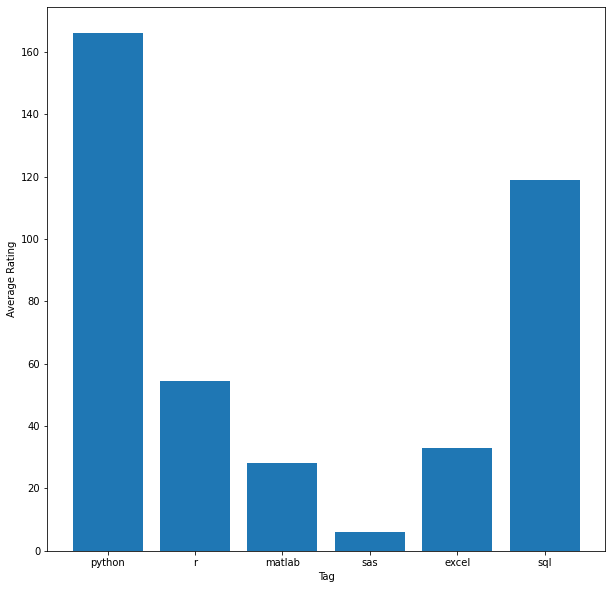

In [232]:
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
#plt.title('Scoring of Data Science Tags')
plt.show()

**Python and SQL has highest score in answers**

Text(0.5, 1.0, 'excel')

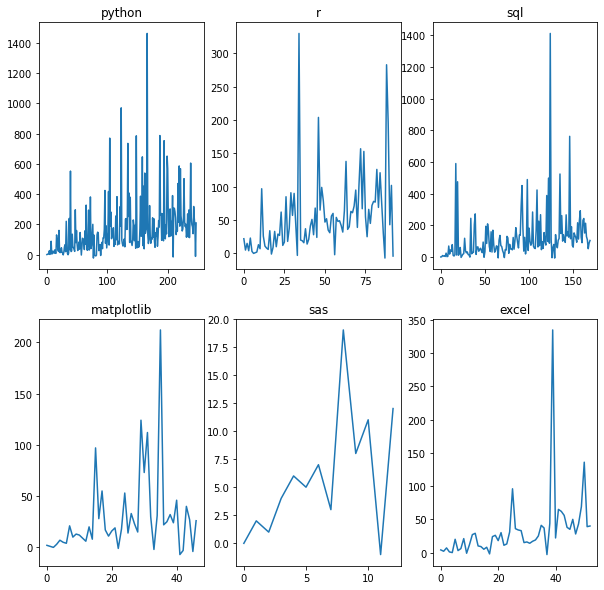

In [233]:
fig, ax = plt.subplots(2, 3)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['r'])
ax[0][1].set_title('r')

ax[0][2].plot(tagRate['sql'])
ax[0][2].set_title('sql')

ax[1][0].plot(tagRate['matlab'])
ax[1][0].set_title('matplotlib')

ax[1][1].plot(tagRate['sas'])
ax[1][1].set_title('sas')

ax[1][2].plot(tagRate['excel'])
ax[1][2].set_title('excel')

**Python and SQL has more answers and sas has less answers **

**1.When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.**


**We need to find the top users answering the questions with Datascience with top reputation tags so that the notification is sent to the experts in the respected tags so that the questions are answered by the experts**

In [90]:
#Analysing the usersdf by reputation as we need to find the top users with high reputation for Datascience tags.
usersdf.reputation.describe()

count    4.654600e+05
mean     1.977049e+03
std      1.098895e+04
min      1.000000e+00
25%      6.600000e+01
50%      3.530000e+02
75%      1.165000e+03
max      1.128126e+06
Name: reputation, dtype: float64

In [91]:
usersdf.shape

(465460, 6)

In [92]:
usersdf.reputation.max()

1128126

In [93]:
usersdf.reputation.min()

1

In [94]:
usersdf.reputation.median()

353.0

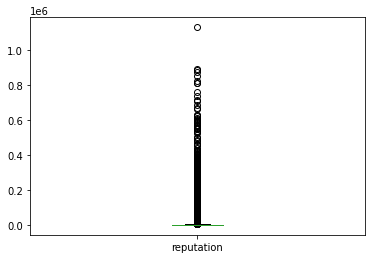

In [95]:
usersdf.reputation.plot.box()

**Reputation is highly Skewed and contains lot of outliers we can standardize the dataset by filtering based on Quartile**

**Univariate Analysis of Reputation in Usersdf**

In [96]:
Q1 = np.percentile(usersdf.reputation, 25, interpolation = 'midpoint') 

In [97]:
Q3 = np.percentile(usersdf.reputation, 75, interpolation = 'midpoint') 

In [98]:
IQR=Q3-Q1
print("Reputation Quartile in the users dataset IQR :",IQR)

Reputation Quartile in the users dataset IQR : 1099.0


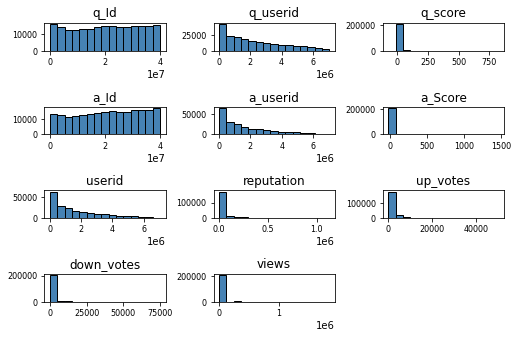

In [99]:
#Analysing the filtered dataset of only Datascience tags Merged_DS is the filtered DS related to Datascience
merged_DS.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [100]:
merged_DS.reputation.describe()

count    2.103610e+05
mean     6.443569e+04
std      1.474824e+05
min      1.000000e+00
25%      1.361000e+03
50%      8.450000e+03
75%      4.869800e+04
max      1.128126e+06
Name: reputation, dtype: float64

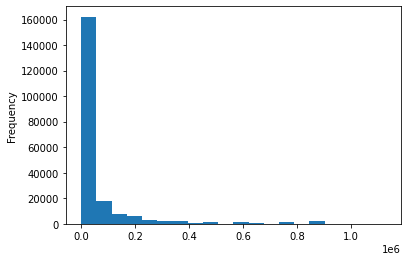

In [101]:
merged_DS["reputation"].plot.hist(bins=20)

**Reputation is skewed which we can standardize using the IQR filtering**

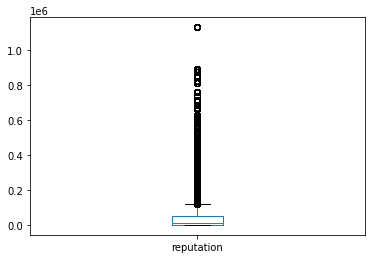

In [102]:
merged_DS["reputation"].plot.box()

**The reputation is totally Skewed in the Datascience Filtered Set so we need to Standardize and will be filtering only the users with reputation in the Quartlie to get maximum reach of the question when it is posted to float it to the respected SME in the tags**

In [103]:
# Computing IQR in Datascience Filetered Set
Q1 = merged_DS['reputation'].quantile(0.25)
Q3 = merged_DS['reputation'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = merged_DS.query('(@Q1 - 1.5 * @IQR) <= reputation <= (@Q3 + 1.5 * @IQR)')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


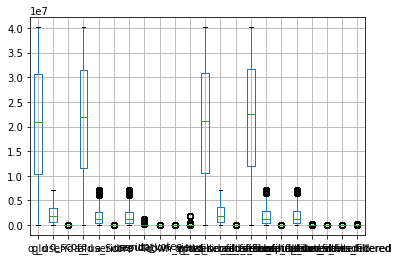

In [104]:
# Ploting the result to check the difference
merged_DS.join(filtered, rsuffix='_filtered').boxplot()

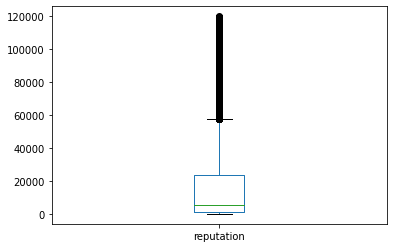

In [105]:
filtered.reputation.plot.box()

Text(0.5, 1.0, 'Distribution of Reputation after Standardization')

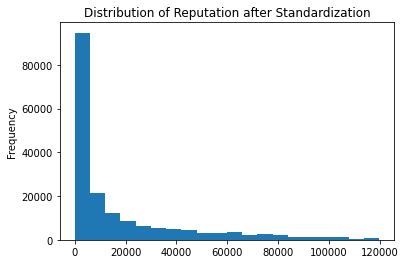

In [106]:
filtered.reputation.plot.hist(bins=20)
plt.title("Distribution of Reputation after Standardization")

In [107]:
filtered.shape

(181204, 17)

**Grouping the Users with respect to tags for filtering for the notification when a question is posted with Datascience tags**

In [108]:
q_expert = filtered[["a_userid","reputation","Tags"]]

**we will use q_expert dataset as DB for sending the notification to relevant users who answer the relevant tags when a question is posted with the tags**

In [109]:
q_expert.sort_values(by="reputation",ascending=False,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
q_expert.head(5)

,a_userid,reputation,Tags
27190,2688.0,119702,sql
81169,14637.0,119365,python
81088,14637.0,119365,r
81158,14637.0,119365,python
81159,14637.0,119365,python


In [111]:
q_expert.shape

(181204, 3)

In [112]:
q_expert.drop_duplicates(subset=["a_userid","Tags"],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
q_expert.head(5)

,a_userid,reputation,Tags
27190,2688.0,119702,sql
81169,14637.0,119365,python
81088,14637.0,119365,r
81063,14637.0,119365,sql
788958,569436.0,119301,sql


In [114]:
df1=q_expert.groupby("Tags")["a_userid"].count()

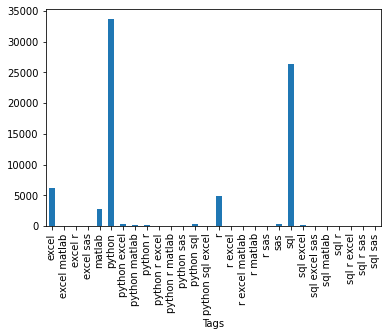

In [115]:
df1.plot.bar()

In [116]:
expert_users=q_expert.groupby("Tags")["a_userid"]

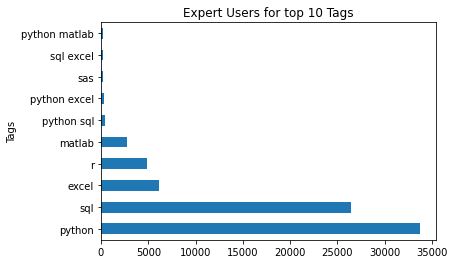

In [117]:
#Filtering the Top 10 Tags with the count of experts
expert_users.count().sort_values(ascending=False)[:10].plot.barh()
plt.title("Expert Users for top 10 Tags")
plt.xlabel="User"
plt.show()

In [118]:
expert_users=pd.DataFrame(q_expert.groupby("Tags")["a_userid"])

In [119]:
expert_users.shape

(28, 2)

In [120]:
expert_users.head()

,0,1
0,excel,236222 59303.0 58603 6819.0 8274...
1,excel matlab,425954 97160.0 1474645 2586922.0 1632...
2,excel r,371464 134830.0 277959 37751.0 713092 ...
3,excel sas,1275340 1623007.0 1504733 2734437.0 3927...
4,matlab,425956 97160.0 117631 44330.0 7865...


**Python and SQL tags has lot of SME and experts in Datascience world so when a question is raised with these tags the notifications can be sent to these users**

**Multivariate Analysis of each feature**

In [121]:
import seaborn as sns

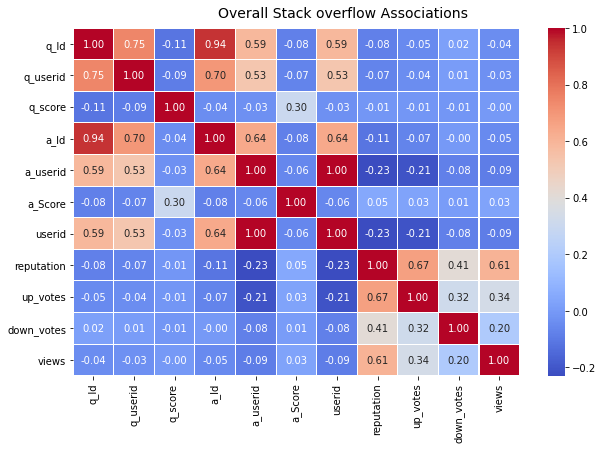

In [122]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = merged_whole.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Overall Stack overflow Associations', fontsize=14)


1.It seems like Up_votes and reputation has positive correlation of 0.67. 
2.Down_votes vs reputation has 0.41 positive correlation.
3.Views vs reputation has 0.61 positive correlation.







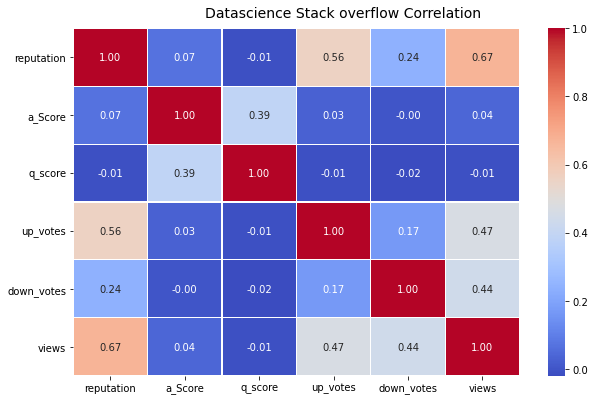

In [123]:
# Correlation Matrix Heatmap
ff=filtered[["reputation","a_Score","q_score","up_votes","down_votes","views"]]
f, ax = plt.subplots(figsize=(10, 6))
corr = ff.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Datascience Stack overflow Correlation', fontsize=14)

1.It seems like Up_votes and reputation has positive correlation of 0.56. 
2.Down_votes vs reputation has 0.24 positive correlation.
3.Views vs reputation has 0.67 positive correlation. 

**2.When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.**

In [287]:
#Analysing Datetime stamps of Questions Created time and answer created time.
time_qa = merged_DS[['q_CreationDate', 'a_CreationDate',"Tag"]]
time_qa.head(2)

,q_CreationDate,a_CreationDate,Tag
6,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql stored-procedures subsonic
21,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql sql-server


In [288]:
#Diffrence between First answer time and Question Created Date
import datetime
time_qa['diff'] = abs(time_qa['a_CreationDate'] - time_qa['q_CreationDate'])
time_qa.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,q_CreationDate,a_CreationDate,Tag,diff
6,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql stored-procedures subsonic,0 days 04:09:28
21,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql sql-server,0 days 00:07:33


In [289]:
print("The max time that takes for a question to be answered",time_qa["diff"].max())

The max time that takes for a question to be answered 2944 days 08:48:01


In [290]:
print("The min time that takes for a question to be answered",time_qa["diff"].min())

The min time that takes for a question to be answered 0 days 00:00:00


In [291]:
print("The mean time for the question to be answered is ",time_qa["diff"].mean())

The mean time for the question to be answered is  57 days 06:01:48.144199719


In [292]:
time_qa.sort_values("diff",ascending=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [293]:
#Changing the datatype of diff to epoch time in seconds
time_qa["diff_epoch"]=time_qa["diff"].astype('int64')//1e9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [294]:
time_qa.head(2)

,q_CreationDate,a_CreationDate,Tag,diff,diff_epoch
694421,2013-11-12 18:34:55+00:00,2013-11-12 18:34:55+00:00,python dictionary,0 days,0
1307699,2015-08-17 19:21:34+00:00,2015-08-17 19:21:34+00:00,python decorator introspection python-decorators,0 days,0


In [295]:
print("The average time response between the question and answer time in Hrs ",np.average(time_qa["diff_epoch"])/3600.0)

The average time response between the question and answer time in Hrs  1374.0300400554813


In [159]:
time_qa["diff_epoch"].describe()

count    2.103610e+05
mean     4.946508e+06
std      2.238292e+07
min      0.000000e+00
25%      4.860000e+02
50%      1.538000e+03
75%      1.123700e+04
max      2.543933e+08
Name: diff_epoch, dtype: float64

In [296]:
time_qa.set_index("q_CreationDate",inplace=True)

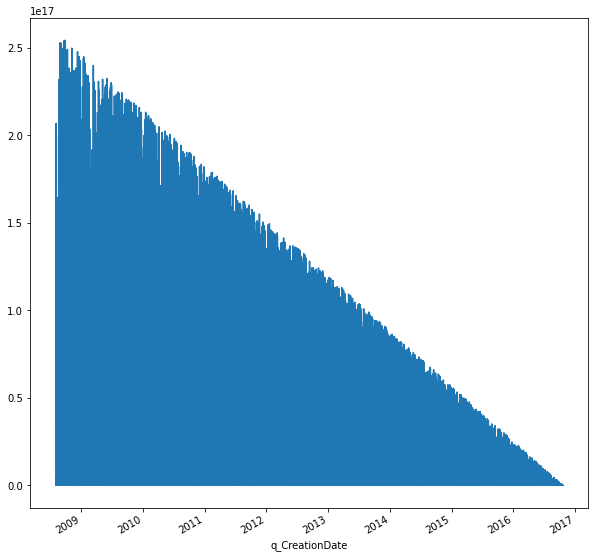

In [297]:
time_qa["diff"].plot.line()

**The response time for the question is declining than 2009 to 2017**

**Does Number of tags has influence on the response time ?**

In [135]:
time_qa.head(2)

,a_CreationDate,Tag,diff
q_CreationDate,,,
2013-11-12 18:34:55+00:00,2013-11-12 18:34:55+00:00,python dictionary,0
2015-08-17 19:21:34+00:00,2015-08-17 19:21:34+00:00,python decorator introspection python-decorators,0


In [136]:
time_qa[time_qa["diff"] > 10][:4]

,a_CreationDate,Tag,diff
q_CreationDate,,,
2008-10-13 07:35:14+00:00,2008-10-13 07:35:25+00:00,python windows windows-vista wxpython pywin32,11
2008-10-17 04:46:08+00:00,2008-10-17 04:46:20+00:00,python python-import,12
2016-01-13 10:14:22+00:00,2016-01-13 10:14:35+00:00,sql sql-server database-performance sqlgeograp...,13
2014-06-05 11:13:52+00:00,2014-06-05 11:14:08+00:00,excel vba clipboard,16


In [298]:
#Creating Tag Count column to see whether there is a differece in the response time when the number of tags
time_qa["tag_count"] = time_qa["Tag"].apply(lambda text: len(text.split(" ")))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [299]:
time_qa.head(2)

,a_CreationDate,Tag,diff,diff_epoch,tag_count
q_CreationDate,,,,,
2013-11-12 18:34:55+00:00,2013-11-12 18:34:55+00:00,python dictionary,0 days,0,2
2015-08-17 19:21:34+00:00,2015-08-17 19:21:34+00:00,python decorator introspection python-decorators,0 days,0,4


In [303]:
time_qa.groupby("tag_count").count()

,a_CreationDate,Tag,diff,diff_epoch
tag_count,,,,
1,20372,20372,20372,20372
2,58656,58656,58656,58656
3,64703,64703,64703,64703
4,42016,42016,42016,42016
5,24614,24614,24614,24614


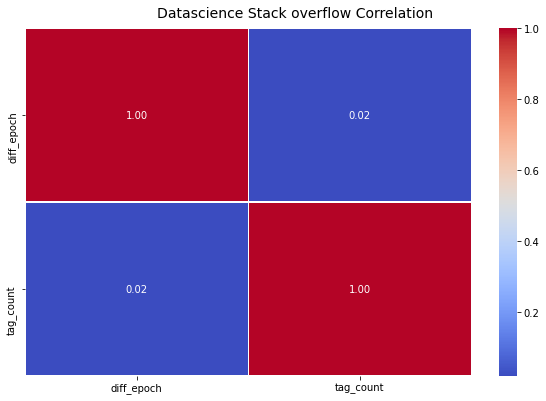

In [168]:
ff=time_qa[["diff_epoch","tag_count"]]
f, ax = plt.subplots(figsize=(10, 6))
corr = ff.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Datascience Stack overflow Correlation', fontsize=14)

**By above graph we can infer that it is no relation between the number of tags and the response time**

**Average response time of questions to Respond for Tags?**

In [273]:
tag_rate = merged_DS[['Tags', 'q_CreationDate', 'a_CreationDate']].drop_duplicates().reset_index(drop=True)
tag_rate['diff'] = abs(tag_rate['q_CreationDate'] - tag_rate['a_CreationDate'])
tag_rate.head()

,Tags,q_CreationDate,a_CreationDate,diff
0,sql,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28
1,sql,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33
2,sql,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,53 days 06:51:03
3,sql,2009-07-01 12:29:25+00:00,2009-07-01 12:34:48+00:00,0 days 00:05:23
4,sql,2011-10-15 02:49:19+00:00,2011-10-15 02:57:29+00:00,0 days 00:08:10


In [274]:
tag_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210245 entries, 0 to 210244
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Tags            210245 non-null  object             
 1   q_CreationDate  210245 non-null  datetime64[ns, UTC]
 2   a_CreationDate  210245 non-null  datetime64[ns, UTC]
 3   diff            210245 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), object(1), timedelta64[ns](1)
memory usage: 6.4+ MB


In [275]:
tag_rate.head(2)

,Tags,q_CreationDate,a_CreationDate,diff
0,sql,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28
1,sql,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33


In [276]:
tag_rate["diffint"]=tag_rate["diff"].astype('timedelta64[s]').astype(int)

In [277]:
tag_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210245 entries, 0 to 210244
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Tags            210245 non-null  object             
 1   q_CreationDate  210245 non-null  datetime64[ns, UTC]
 2   a_CreationDate  210245 non-null  datetime64[ns, UTC]
 3   diff            210245 non-null  timedelta64[ns]    
 4   diffint         210245 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 8.0+ MB


In [268]:
tag_rate.head(2)

,Tags,q_CreationDate,a_CreationDate,diff,diffint
0,sql,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28,14968
1,sql,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33,453


In [278]:
AnsRate = {}
for i in tqdm_notebook(range(len(tag_rate['Tags']))):
    for tag in tag_rate['Tags'][i].split(','):
        try:
            AnsRate[tag].append(tag_rate['diffint'][i])
        except Exception:
            AnsRate[tag] = [tag_rate['diffint'][i]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [279]:
tagRateAvg = {}
for key in list(AnsRate.keys()):
    tagRateAvg[key] = np.average(AnsRate[key])

In [280]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'diffint']
tagRateAvg = tagRateAvg.sort_values('diffint')

In [282]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['diffint'])[index])

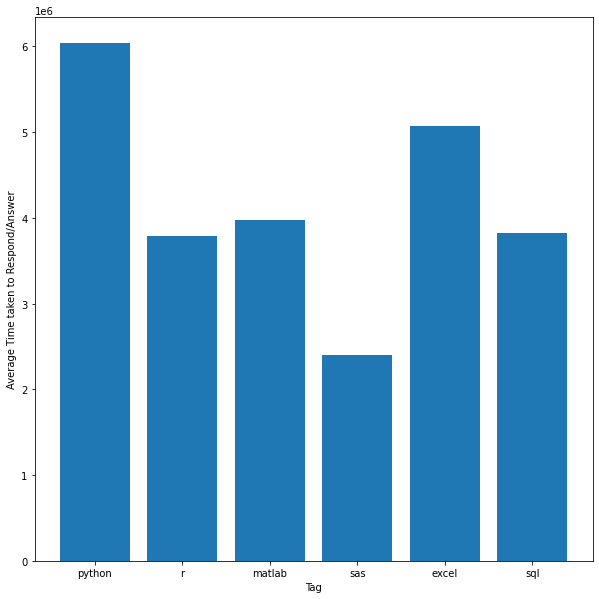

In [284]:
plt.bar(x, y)
plt.ylabel('Average Time taken to Respond/Answer')
plt.xlabel('Tag')
#plt.title('Active/Inactive Community in Data Science')
plt.show()

**by the above graph Python and Excel,matlab tags have good average response time for the questions**